## Leise filter development

So the filter itself is in the leise_filt.f file. There is also an example of how to use it in the `leise-example.c` file. 

Build like so -- \
    `gfortran -o leise_example leise_filt.f leise_example.c`\
Run --\
   `./leise_example`
   
I've saved and plotted the output of this example below so we can check our python implementation.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
f = np.zeros((6,7), dtype='f')
f[2:4, 2:5] = 4.0
f_leise = np.array([[0.016, -0.047, -0.203, -0.281, -0.203, -0.047,  0.016],
                  [-0.047,  0.141,  0.609,  0.844,  0.609,  0.141, -0.047],
                  [-0.219,  0.656,  2.844,  3.938,  2.844,  0.656, -0.219],
                  [-0.219,  0.656,  2.844,  3.938,  2.844,  0.656, -0.219],
                  [-0.047,  0.141,  0.609,  0.844,  0.609,  0.141, -0.047],
                  [ 0.016, -0.047, -0.203, -0.281, -0.203, -0.047,  0.016]])

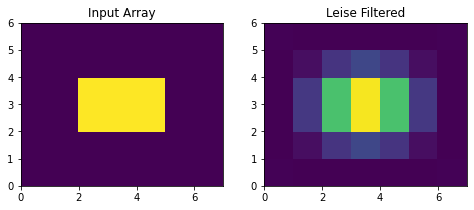

In [10]:
fig = plt.figure(figsize = (8,3))
ax = fig.add_subplot(121)
ax.pcolormesh(f, vmin=0, vmax = 4)
ax.set_title('Input Array')
ax = fig.add_subplot(122)
ax.pcolormesh(f_leise, vmin=0, vmax = 4)
ax.set_title('Leise Filtered')
plt.show()

I've tried the following to get it wrapped in python:

`python -m numpy.f2py -c leise_filt.f -m leise`

which does compile and produces the *leise.cpython-37m-x86_64-linux-gnu.so* file in this folder. This allows me to import the new `leise` module and print the info for the required function.

In [15]:
import leise
print(leise.t5fltr.__doc__)

t5fltr(y,n1,n2,n3,nstep)

Wrapper for ``t5fltr``.

Parameters
----------
y : input rank-1 array('f') with bounds (1)
n1 : input int
n2 : input int
n3 : input int
nstep : input int



However when I try to actually do the filtering, i get an error saying that it expects the input array to be 1 long. I cant see where the length of the input array is meant to be allocated or how to change this so this is where I'm stuck. Thank you!!

In [16]:
leise.t5fltr(f.ravel(), 6,7,1,1)

ValueError: failed in converting 1st argument `y' of leise.t5fltr to C/Fortran array